In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timecalc = 9
tolerance = 1e-7

# load the data
p_ind_read, frame_read, x_read, y_read = np.genfromtxt(
    "./20170202c059_RPE1_CAG_H2B_Halotag_TMR80pM_nonlam_non_starve_ctrl_info.txt",
    unpack=True,
)

# data
data = np.array([p_ind_read, frame_read, x_read, y_read])
data = data.T

In [3]:
# print all shapes
print("data.shape", data.shape)
print("data[0] : ", data[0])

data.shape (11579, 4)
data[0] :  [  1.     0.   148.37 108.4 ]


In [4]:
class Nucleosome:
    def __init__(self, p_ind, data):
        self.p_ind = p_ind
        self.traj = self.get_traj(data)
        self.in_time = self.traj[0, 0]
        self.out_time = self.traj[-1, 0]
        
    
    def get_traj(self, data):
        traj = data[data[:, 0] == self.p_ind]
        traj = traj[:, 1:4]                         # have only [frame, x, y]
        return traj
    

1342
(1342,)


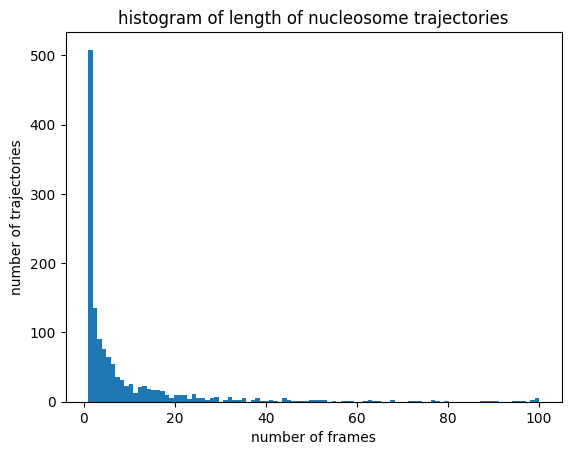

In [5]:
# initialize nucleosomes
nucleosomes = []
for p_ind in np.unique(data[:, 0]):
    nucleosomes.append(Nucleosome(p_ind, data))

hist = []
print(len(nucleosomes))
for nucleosome in nucleosomes:
    if len(nucleosome.traj) > 0:
        hist.append(len(nucleosome.traj))
    # print(len(nucleosome.traj))

hist = np.array(hist)
print(hist.shape)
plt.hist(hist, bins=max(hist))
plt.title("histogram of length of nucleosome trajectories")
plt.xlabel("number of frames")
plt.ylabel("number of trajectories")
plt.show()

In [6]:
# calculate msd for each trajectory which has more than 20 frames
cutoff = 20
msd = []
selected_p_ind = []
stat_rel = 10
for n in nucleosomes:
    if len(n.traj) > cutoff+stat_rel:
        curmsd = np.zeros(cutoff+stat_rel)
        traj = n.traj[:cutoff+stat_rel]
        for i in range(1, cutoff+stat_rel):
            # vectorized
            curmsd[i] = np.sum((traj[i:, 1:3] - traj[0:-i, 1:3])**2) / (cutoff+stat_rel - i)
        msd.append([n.p_ind, curmsd[:cutoff]*4225])    # px^2 to nm^2
        selected_p_ind.append(n.p_ind)
# msd = np.array(msd)
print("msd.shape", len(msd))
print("selected_p_ind.shape", len(selected_p_ind))

msd.shape 89
selected_p_ind.shape 89


/tmp/ipykernel_69467/1818986684.py:6: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(np.arange(0, 1.05, 0.05))
/tmp/ipykernel_69467/1818986684.py:9: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(msd[i][1])   # 4225 nm^2 per pixel^2


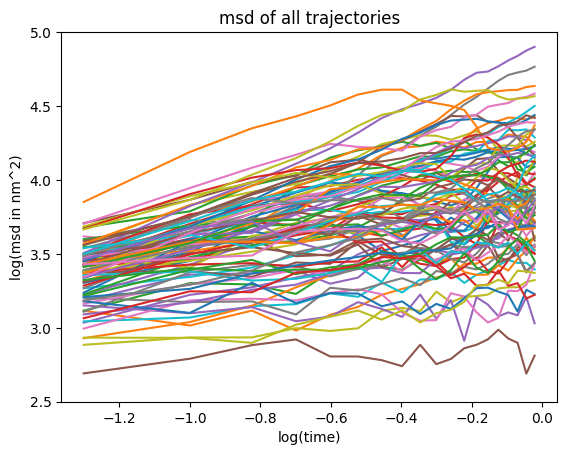

(37, 20)


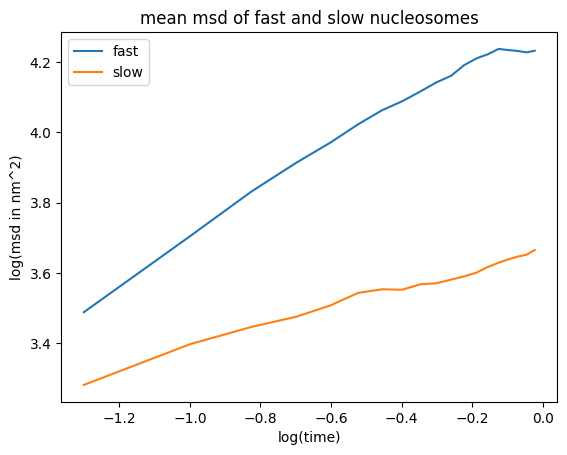

In [7]:
# plot all msd
# y is log of msd
# x is log of time
# np arange 100 frames from 0 s to 5 s
logy = []
x = np.log10(np.arange(0, 1.05, 0.05))
for i in range(len(msd)):
    # if len(msd[i][1]) > 19:
    y = np.log10(msd[i][1])   # 4225 nm^2 per pixel^2
    # y = y[:20]
    logy.append(y)
    # selected_p_ind.append(msd[i][0])
    # plt.plot(msd[i])
    plt.plot(x[:len(y)], y)
plt.title("msd of all trajectories")
plt.xlabel("log(time)")
plt.ylabel("log(msd in nm^2)")
plt.ylim(2.5, 5)
plt.show()

# plot mean msd of fast nucleosomes
logy = np.array(logy)
# select fast as those having msd at 0.75 s > 2*4225 nm^2
fast = []
slow = []
for i in range(len(logy)):
    if logy[i][15] > np.log10(2*4225):
        fast.append(logy[i])
    else:
        slow.append(logy[i])
fast = np.array(fast)
slow = np.array(slow)

print(fast.shape)

fastmeany = np.mean(fast, axis=0)
# faststdy = np.std(fast, axis=0)
slowmeany = np.mean(slow, axis=0)
# slowstdy = np.std(slow, axis=0)

plt.plot(x[:len(fastmeany)], fastmeany, label="fast")
plt.plot(x[:len(slowmeany)], slowmeany, label="slow")
plt.title("mean msd of fast and slow nucleosomes")
plt.xlabel("log(time)")
plt.ylabel("log(msd in nm^2)")
plt.legend()
plt.show()

In [8]:
print(logy.shape)
print(logy)

selected_p_ind = np.array(selected_p_ind)
print(selected_p_ind.shape)
print(selected_p_ind)

(89, 20)
[[      -inf 3.33713641 3.56399606 ... 3.75387039 3.8974728  3.92207296]
 [      -inf 3.11525175 3.0153029  ... 3.50261725 3.61054525 3.52714631]
 [      -inf 3.11572218 3.30224268 ... 3.62545239 3.57591152 3.61013713]
 ...
 [      -inf 3.42907421 3.47175488 ... 3.7925027  3.70508034 3.82821594]
 [      -inf 3.18448978 3.2908982  ... 3.86030116 3.88031437 3.87588724]
 [      -inf 2.93334488 2.93220578 ... 3.38611578 3.38079266 3.37071684]]
(89,)
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30. 130. 131. 132. 177. 178. 179. 203. 232. 233. 255. 263. 264.
 285. 303. 304. 305. 321. 322. 330. 351. 352. 369. 370. 382. 409. 424.
 436. 447. 460. 461. 462. 473. 474. 499. 545. 546. 561. 584. 585. 598.
 611. 622. 654. 683. 748. 755. 778. 787. 824. 825. 842. 874. 885. 886.
 925. 934. 949. 960. 967.]


In [9]:
# go over each selected trajectory and calculate alpha using polyfit
new_traj = np.zeros((len(selected_p_ind)*cutoff, 4))   # x,y,t,alpha
new_traj[:, 2] = np.tile(np.arange(0, 1.0, 0.05), len(selected_p_ind))

alpha_analysis = []

for i in range(len(selected_p_ind)):
    # get the x and y of the p_ind
    p_ind = int(selected_p_ind[i])
    traj = nucleosomes[p_ind-1].traj
    traj = traj[:cutoff]

    new_traj[i*cutoff:(i+1)*cutoff, 0] = traj[:, 1]
    new_traj[i*cutoff:(i+1)*cutoff, 1] = traj[:, 2]

    xfull = np.log10(np.arange(0, 1.05, 0.05))
    # calculate alpha1
    x1 = xfull[1:6]
    y1 = logy[i][1:6]
    alpha1 = 1
    alpha1, D1 = np.polyfit(x1, y1, 1)

    print("alpha1", alpha1)

    # calculate alpha2
    x2 = xfull[6:20]
    y2 = logy[i][6:20]
    alpha2 = 1
    alpha2, D2 = np.polyfit(x2, y2, 1)
    print("alpha2", alpha2)
    print()

    alpha_analysis.append([alpha1, alpha2])

    new_traj[i*cutoff:(i+1)*cutoff, 3] = np.concatenate((np.tile(alpha1, 6), np.tile(alpha2, 14)))

print(new_traj.shape)


alpha1 0.523811382918909
alpha2 0.5896037613591036

alpha1 -0.0692336491002475
alpha2 0.8413706242593353

alpha1 0.2777049184772978
alpha2 0.5267082494843834

alpha1 0.7596170712408441
alpha2 -0.053792911257479085

alpha1 0.2065283957663424
alpha2 0.6107457947997267

alpha1 0.2476636023992729
alpha2 0.16520465514250585

alpha1 0.15451684764994084
alpha2 0.36149110360797065

alpha1 0.6394847604595212
alpha2 1.5139934417739433

alpha1 0.14752193006992811
alpha2 0.5389873049009469

alpha1 0.40375844433784724
alpha2 0.4877550256220992

alpha1 0.7997978045969145
alpha2 -0.2011902994919323

alpha1 0.9595060258758669
alpha2 0.30702054982743243

alpha1 0.6078202864580478
alpha2 0.009447442351027275

alpha1 0.25280650065277577
alpha2 0.11825114670078284

alpha1 0.49067742550647875
alpha2 0.762940261607524

alpha1 0.08466116359201528
alpha2 0.33094866319149974

alpha1 0.6598010488947678
alpha2 -0.028947958995294194

alpha1 0.4627853270806361
alpha2 0.04359472081604018

alpha1 0.7069665569569059


/tmp/ipykernel_69467/1017942556.py:16: RuntimeWarning: divide by zero encountered in log10
  xfull = np.log10(np.arange(0, 1.05, 0.05))


In [10]:
# save the new_traj upto 3 decimal places
np.savetxt("new_traj.txt", new_traj, delimiter="\t", fmt="%.3f")
############### note that here, the scheme is x,y,t,alpha #####################

# save the new_traj frame wise in a single file
with open("new_traj_frame_wise.txt", "w") as f:
    for i in range(cutoff):
        for j in range(len(selected_p_ind)):
            # x,y,alpha,t
            f.write("%.3f\t%.3f\t%.3f\t%.3f\n" % (new_traj[j*cutoff+i, 0], new_traj[j*cutoff+i, 1], new_traj[j*cutoff+i, 3], new_traj[j*cutoff+i, 2]))
        # f.write("\n")

############### note that here, the scheme is x,y,alpha,t #####################


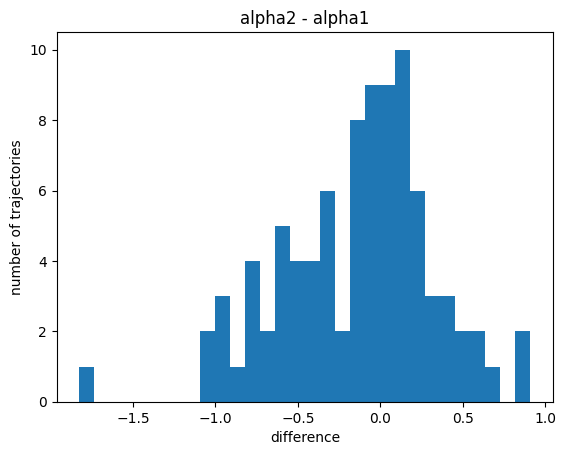

In [11]:
# plot the difference between alpha1 and alpha2
alpha_analysis = np.array(alpha_analysis)
diff = alpha_analysis[:, 1] - alpha_analysis[:, 0]
plt.hist(diff, bins=30)
plt.title("alpha2 - alpha1")
plt.xlabel("difference")
plt.ylabel("number of trajectories")
plt.show()

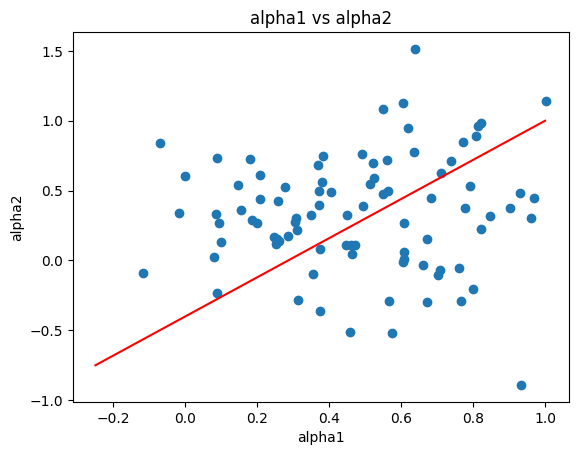

In [12]:
# plot the alpha1 and alpha2
plt.scatter(alpha_analysis[:, 0], alpha_analysis[:, 1])
plt.xlabel("alpha1")
plt.ylabel("alpha2")
plt.title("alpha1 vs alpha2")
# plot x=y line
plt.plot([-0.25, 1], [-0.75, 1], color="red")
plt.show()